Importing:

In [4]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [5]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [6]:
%run "src/dataloading.ipynb"
%run "src/training.ipynb"
%run "src/evaluate.ipynb"
%run "src/visualizations.ipynb"
%run "src/model_architectures.ipynb"

Data loaded


Training:

In [7]:
def update_current_model(json_file, new_model_name):
    # Load the JSON data from the file
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Update the current-model value
    data['current-model'] = new_model_name

    # Save the updated JSON data back to the file
    with open(json_file, 'w') as file:
        json.dump(data, file, indent=4)
json_file_path = 'configs/model_configs.json'
new_model_name = 'ResNet'
update_current_model(json_file_path, new_model_name)

In [8]:

model_config_file = open('configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'ResNet':
        model = MRI_ResNet
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

Training and Testing Scratch ResNet:

In [9]:
training_losses = []
validation_losses = []
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_set, val_set = torch.utils.data.random_split(training_set, [1 - val_ratio, val_ratio])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size,shuffle=True)

    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)
    training_losses.append(train_loss)
    validation_losses.append(val_loss)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   8%|▊         | 1/12 [00:06<01:13,  6.70s/epoch]

Epoch [1/12] Train Loss: 0.9483 Train Accuracy: 63.19% Validation Loss: 0.8401 Validation Accuracy: 67.04%


Training:  17%|█▋        | 2/12 [00:12<01:02,  6.24s/epoch]

Epoch [2/12] Train Loss: 0.6388 Train Accuracy: 76.86% Validation Loss: 0.5614 Validation Accuracy: 78.35%


Training:  25%|██▌       | 3/12 [00:18<00:54,  6.07s/epoch]

Epoch [3/12] Train Loss: 0.4726 Train Accuracy: 82.19% Validation Loss: 0.3263 Validation Accuracy: 89.01%


Training:  33%|███▎      | 4/12 [00:24<00:47,  5.99s/epoch]

Epoch [4/12] Train Loss: 0.2822 Train Accuracy: 90.96% Validation Loss: 0.3198 Validation Accuracy: 88.69%


Training:  42%|████▏     | 5/12 [00:30<00:41,  5.96s/epoch]

Epoch [5/12] Train Loss: 0.2866 Train Accuracy: 89.99% Validation Loss: 0.2992 Validation Accuracy: 90.31%


Training:  50%|█████     | 6/12 [00:36<00:35,  5.94s/epoch]

Epoch [6/12] Train Loss: 0.1483 Train Accuracy: 96.02% Validation Loss: 0.1550 Validation Accuracy: 94.67%


Training:  58%|█████▊    | 7/12 [00:42<00:29,  5.92s/epoch]

Epoch [7/12] Train Loss: 0.1895 Train Accuracy: 93.81% Validation Loss: 0.1572 Validation Accuracy: 95.80%


Training:  67%|██████▋   | 8/12 [00:47<00:23,  5.93s/epoch]

Epoch [8/12] Train Loss: 0.0769 Train Accuracy: 97.85% Validation Loss: 0.0945 Validation Accuracy: 97.09%


Training:  75%|███████▌  | 9/12 [00:53<00:17,  5.90s/epoch]

Epoch [9/12] Train Loss: 0.0825 Train Accuracy: 97.79% Validation Loss: 0.0608 Validation Accuracy: 98.87%


Training:  83%|████████▎ | 10/12 [00:59<00:11,  5.88s/epoch]

Epoch [10/12] Train Loss: 0.1802 Train Accuracy: 95.53% Validation Loss: 0.1053 Validation Accuracy: 96.61%


Training:  92%|█████████▏| 11/12 [01:05<00:05,  5.88s/epoch]

Epoch [11/12] Train Loss: 0.2523 Train Accuracy: 91.66% Validation Loss: 0.1237 Validation Accuracy: 95.32%


Training: 100%|██████████| 12/12 [01:11<00:00,  5.95s/epoch]

Epoch [12/12] Train Loss: 0.1238 Train Accuracy: 95.86% Validation Loss: 0.0632 Validation Accuracy: 98.22%


In [10]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:   8%|▊         | 1/12 [00:00<00:09,  1.11epoch/s]

Testing Epoch [1/12] Test Loss: 0.4314 Test Accuracy: 86.43% Time per Epoch: 0.90 seconds


Testing:  17%|█▋        | 2/12 [00:01<00:09,  1.08epoch/s]

Testing Epoch [2/12] Test Loss: 0.4524 Test Accuracy: 87.08% Time per Epoch: 0.93 seconds


Testing:  25%|██▌       | 3/12 [00:02<00:08,  1.06epoch/s]

Testing Epoch [3/12] Test Loss: 0.4020 Test Accuracy: 86.27% Time per Epoch: 0.97 seconds


Testing:  33%|███▎      | 4/12 [00:03<00:07,  1.04epoch/s]

Testing Epoch [4/12] Test Loss: 0.4193 Test Accuracy: 85.62% Time per Epoch: 0.99 seconds


Testing:  42%|████▏     | 5/12 [00:04<00:06,  1.05epoch/s]

Testing Epoch [5/12] Test Loss: 0.3678 Test Accuracy: 88.21% Time per Epoch: 0.93 seconds


Testing:  50%|█████     | 6/12 [00:05<00:05,  1.06epoch/s]

Testing Epoch [6/12] Test Loss: 0.4080 Test Accuracy: 85.78% Time per Epoch: 0.94 seconds


Testing:  58%|█████▊    | 7/12 [00:06<00:04,  1.07epoch/s]

Testing Epoch [7/12] Test Loss: 0.4192 Test Accuracy: 86.43% Time per Epoch: 0.91 seconds


Testing:  67%|██████▋   | 8/12 [00:07<00:03,  1.06epoch/s]

Testing Epoch [8/12] Test Loss: 0.3842 Test Accuracy: 87.08% Time per Epoch: 0.95 seconds


Testing:  75%|███████▌  | 9/12 [00:08<00:02,  1.07epoch/s]

Testing Epoch [9/12] Test Loss: 0.4019 Test Accuracy: 87.08% Time per Epoch: 0.91 seconds


Testing:  83%|████████▎ | 10/12 [00:09<00:01,  1.08epoch/s]

Testing Epoch [10/12] Test Loss: 0.3818 Test Accuracy: 87.40% Time per Epoch: 0.91 seconds


Testing:  92%|█████████▏| 11/12 [00:10<00:00,  1.08epoch/s]

Testing Epoch [11/12] Test Loss: 0.4022 Test Accuracy: 87.24% Time per Epoch: 0.92 seconds


Testing: 100%|██████████| 12/12 [00:11<00:00,  1.07epoch/s]

Testing Epoch [12/12] Test Loss: 0.3961 Test Accuracy: 87.08% Time per Epoch: 0.91 seconds
Average Test Loss: 0.4055
Average Test Accuracy: 86.81%


Model Classification Model 1:

              precision    recall  f1-score   support

           0       0.90      0.81      0.86       186
           1       0.80      0.85      0.82       177
           2       0.91      0.95      0.93        87
           3       0.89      0.92      0.90       169

    accuracy                           0.87       619
   macro avg       0.88      0.88      0.88       619
weighted avg       0.87      0.87      0.87       619



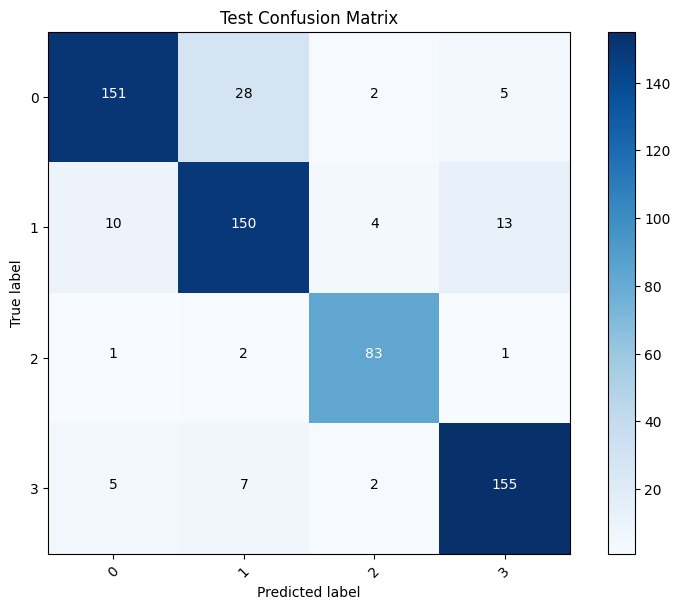

In [11]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

# print(classification_report(train_labels, train_preds))
# print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
# plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
# plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()

ROC Curver for Scratch ResNet:

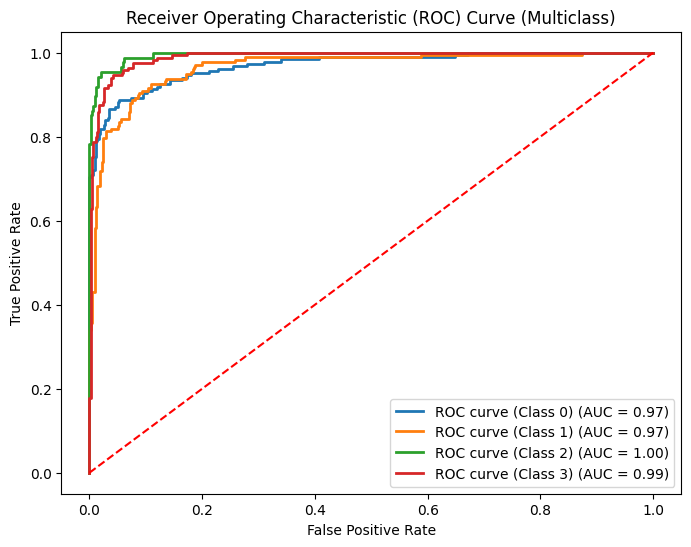

In [12]:
plot_auc_curve_multiclass(model,test_loader,4)

Training and Testing PreBuilt ResNet:

In [13]:
update_current_model(json_file_path, "ResNet-Pre")
model_config_file = open('configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'ResNet-Pre':
        model = MRI_Pretrained_ResNet
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

In [19]:
training_losses = []
validation_losses = []
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_set, val_set = torch.utils.data.random_split(training_set, [1 - val_ratio, val_ratio])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size,shuffle=True)

    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)
    training_losses.append(train_loss)
    validation_losses.append(val_loss)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )

Training:   0%|          | 0/10 [00:18<?, ?epoch/s]


KeyboardInterrupt: 

In [ ]:
test_losses2 = []
test_accuracies2 = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss2, test_accuracy2, test_label2, test_preds2 = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses2.append(test_loss2)
    test_accuracies2.append(test_accuracy2)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss2:.4f} "
        f"Test Accuracy: {test_accuracy2 * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses2) / len(test_losses2)
avg_test_accuracy = sum(test_accuracies2) / len(test_accuracies2)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  10%|█         | 1/10 [00:05<00:45,  5.07s/epoch]

Testing Epoch [1/10] Test Loss: 0.2072 Test Accuracy: 94.18% Time per Epoch: 5.07 seconds


Testing:  20%|██        | 2/10 [00:10<00:40,  5.06s/epoch]

Testing Epoch [2/10] Test Loss: 0.2307 Test Accuracy: 92.25% Time per Epoch: 5.05 seconds


Testing:  30%|███       | 3/10 [00:15<00:35,  5.06s/epoch]

Testing Epoch [3/10] Test Loss: 0.2208 Test Accuracy: 93.21% Time per Epoch: 5.05 seconds


Testing:  40%|████      | 4/10 [00:20<00:30,  5.04s/epoch]

Testing Epoch [4/10] Test Loss: 0.2207 Test Accuracy: 94.02% Time per Epoch: 5.02 seconds


Testing:  50%|█████     | 5/10 [00:25<00:25,  5.05s/epoch]

Testing Epoch [5/10] Test Loss: 0.2076 Test Accuracy: 94.67% Time per Epoch: 5.05 seconds


Testing:  60%|██████    | 6/10 [00:30<00:20,  5.05s/epoch]

Testing Epoch [6/10] Test Loss: 0.2097 Test Accuracy: 92.89% Time per Epoch: 5.06 seconds


Testing:  70%|███████   | 7/10 [00:35<00:15,  5.05s/epoch]

Testing Epoch [7/10] Test Loss: 0.1665 Test Accuracy: 94.99% Time per Epoch: 5.04 seconds


Testing:  80%|████████  | 8/10 [00:40<00:10,  5.05s/epoch]

Testing Epoch [8/10] Test Loss: 0.1898 Test Accuracy: 94.02% Time per Epoch: 5.04 seconds


Testing:  90%|█████████ | 9/10 [00:45<00:05,  5.05s/epoch]

Testing Epoch [9/10] Test Loss: 0.2377 Test Accuracy: 94.02% Time per Epoch: 5.06 seconds


Testing: 100%|██████████| 10/10 [00:50<00:00,  5.05s/epoch]

Testing Epoch [10/10] Test Loss: 0.1891 Test Accuracy: 93.86% Time per Epoch: 5.05 seconds
Average Test Loss: 0.2080
Average Test Accuracy: 93.81%


Model Classification for Model 2:

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       186
           1       0.89      0.93      0.91       177
           2       0.98      0.99      0.98        87
           3       0.95      0.99      0.97       169

    accuracy                           0.94       619
   macro avg       0.94      0.95      0.94       619
weighted avg       0.94      0.94      0.94       619



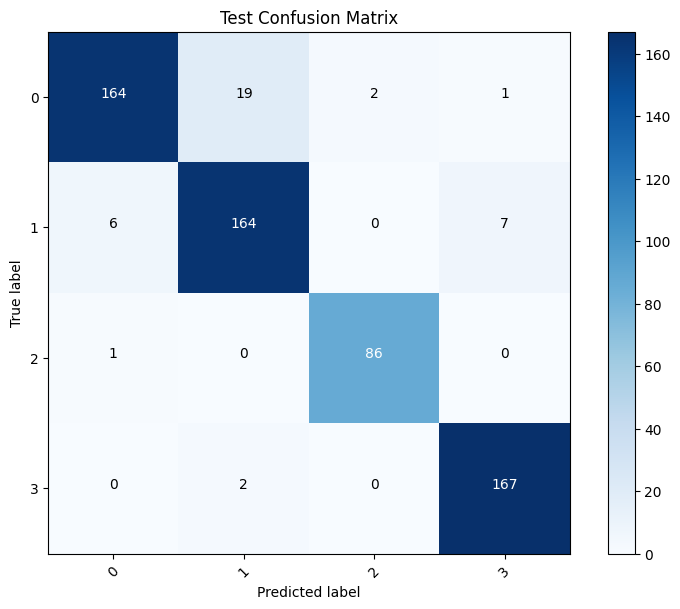

In [ ]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_label2, test_preds2)

# print(classification_report(train_labels2, train_preds2))
# print(classification_report(val_labels2, val_preds2))
print(classification_report(test_label2, test_preds2))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
# plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
# plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()

ROC Curve for PreBuilt Resnet:

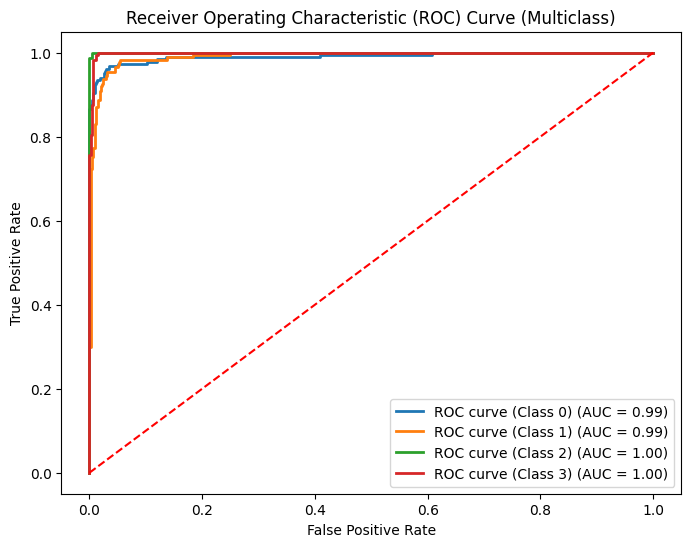

In [ ]:
plot_auc_curve_multiclass(model,test_loader,4)